In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import argparse
import numpy as np
from scipy.optimize import curve_fit

In [23]:
parser = argparse.ArgumentParser(description='')
parser.add_argument('--file', '-f', type=list, help='Input file path')
files = ['/home/robertkralik/Documents/School/PhysicsWork/HyperKPMTValidation/IntegrationRangeCharacterisation/IntegrationRangeCharacterisation.csv']
options = ['-f', files]
args = parser.parse_args(args=options)

plt.style.use('seaborn-v0_8-colorblind')

In [24]:
brand_dict = {"ham": "Hamamatsu", "nnvt" : "NNVT", "NNVT":"NNVT", "HAM": "Hamamatsu"}
markers = ['o', 's', 'v', '^']
colors = ("b", "orange", "g", "r", "c", "m", "y", "k")

# Marker size is a bit small by default
msize = 20 #15
fontsize = 15

In [25]:
fname = args.file[0]
df = pd.read_csv(fname)

# Assumes standarde file naming format
def get_v_from_fname(row):
    base = Path(row["fname"]).stem

    # Get brand model and voltage from filename
    brand, model, voltage = base.split("_")
    brand = brand_dict[brand]
    # Get rid of "v" in string if there
    if voltage[-1] == "V" or voltage[-1] == "v":
        voltage = voltage[:-1]

    return brand, model, float(voltage)

# Expand here means when apply returns multiple values, they get assigned to
# each given new column
df[["brand","model","v"]] = df.apply(get_v_from_fname, axis="columns", result_type="expand")

# Sort values by angles is in order
df = df.sort_values(["gate"], ascending=True)

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_297778/56446282.py:5: SyntaxWarning: invalid escape sequence '\c'
  "$\chi^{2}$ / NDoF", "Single Photo Electron Charge [pC]", "Single Photo Electron $\sigma$", "Gain", "Peak-to-Valley ratio (from fit)", "Peak-to-Valley ratio (from histogram)", "Single Photo Electron resolution", "True number of Photo Electrons"
/tmp/ipykernel_297778/56446282.py:5: SyntaxWarning: invalid escape sequence '\s'
  "$\chi^{2}$ / NDoF", "Single Photo Electron Charge [pC]", "Single Photo Electron $\sigma$", "Gain", "Peak-to-Valley ratio (from fit)", "Peak-to-Valley ratio (from histogram)", "Single Photo Electron resolution", "True number of Photo Electrons"
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with 

pmt PN2305-1100(New)
chisqr


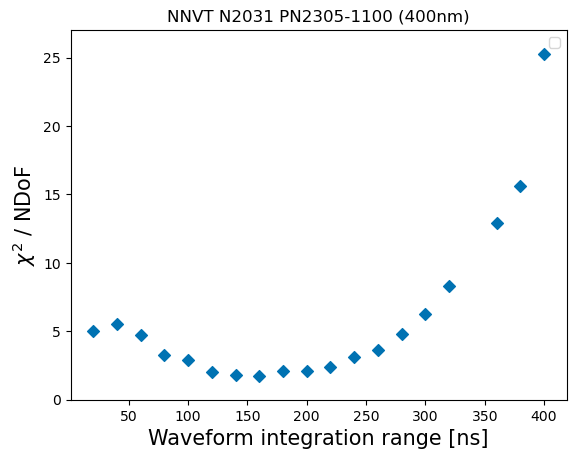

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


SPE_charge


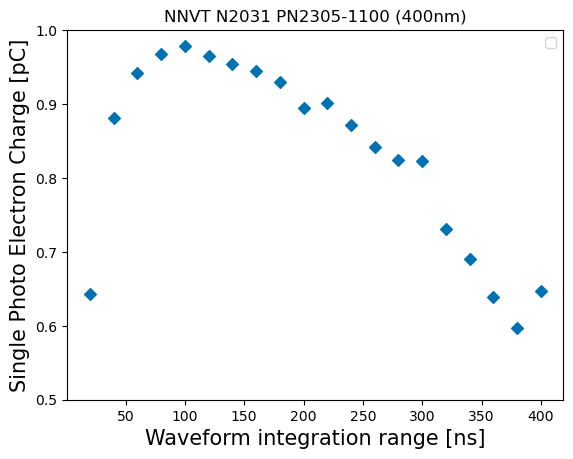

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


SPE_sigma


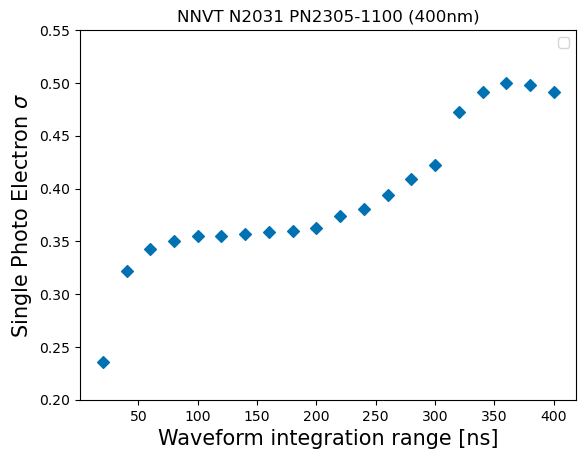

gain


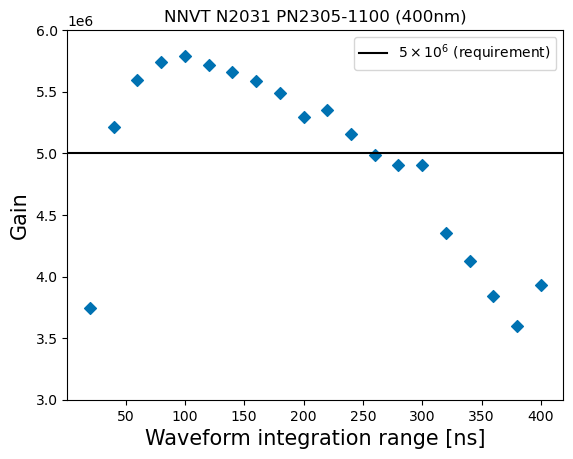

pv_r


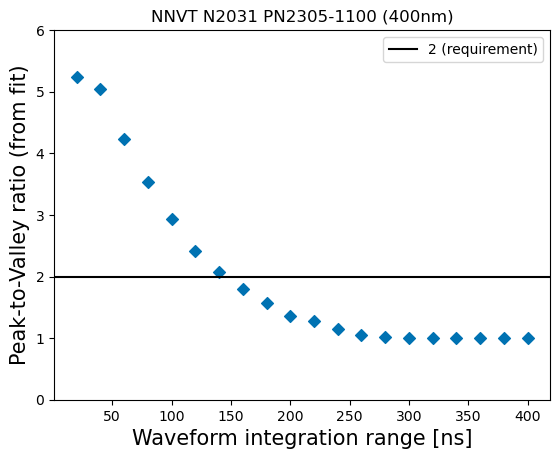

pv_r_hist


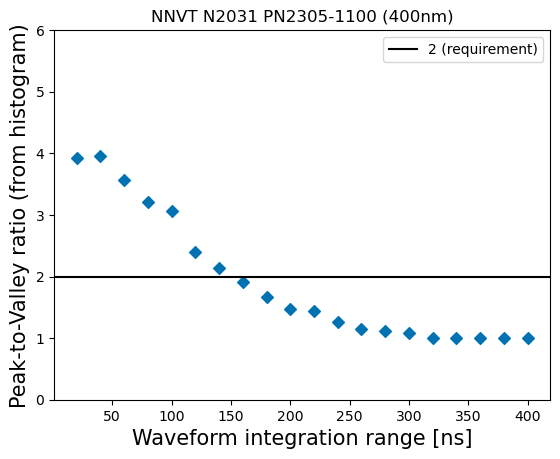

pe_res


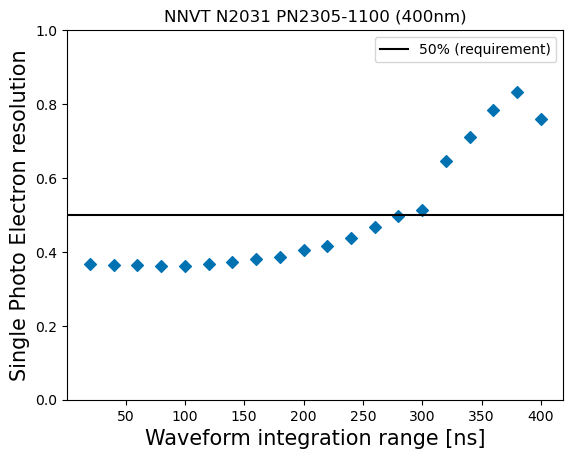

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


true_PE


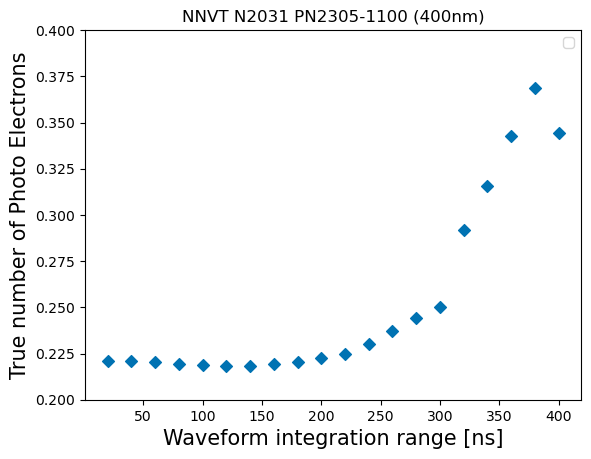

In [31]:
variables = [
    "chisqr", "SPE_charge", "SPE_sigma", "gain", "pv_r", "pv_r_hist", "pe_res", "true_PE"
]
label = [
    "$\chi^{2}$ / NDoF", "Single Photo Electron Charge [pC]", "Single Photo Electron $\sigma$", "Gain", "Peak-to-Valley ratio (from fit)", "Peak-to-Valley ratio (from histogram)", "Single Photo Electron resolution", "True number of Photo Electrons"
]
range = [
    (0,27.), (0.5,1.), (0.2,0.55), (3E+6,6E+6), (0,6), (0,6), (0,1.), (0.2,0.4)
]

gain = []
gain_err = []
hv = df['v'].values[0]
pmt = df["model"].values[0]
# Set the style based on PMT
print('pmt',pmt)
if 'KM' in pmt:
    marker = markers[0]
    linestyle = '-'
elif 'PN' in pmt:
    marker = markers[1]
    linestyle = ':'

# Cycle through grouped df plotting each azimuthal angle
idx=0
for var in variables:
    print(var)
    
    fig, ax = plt.subplots()
    ax.scatter(2*df['gate'].values, df[var].values, marker="D")
    #ax.plot(2*df['gate'].values, df[var].values)
    ax.set_ylim([range[idx][0],range[idx][1]])
    ax.set_xlabel("Waveform integration range [ns]",fontsize=fontsize)
    ax.set_ylabel(f"%s"%label[idx], fontsize=fontsize)
    ax.title.set_text("NNVT N2031 PN2305-1100 (400nm)")

    if var=='gain':
        ax.axhline(5e6, linestyle='-', color='black', label=r'$5\times10^6$ (requirement)')
    if var=='pe_res':
        ax.axhline(0.5, linestyle='-', color='black', label=r'50% (requirement)')
    if var=='pv_r' or var=='pv_r_hist':
        ax.axhline(2, linestyle='-', color='black', label=r'2 (requirement)')
    ax.legend()

    #fig.set_size_inches(14,8)
    fig.savefig("IntegrationRange_"+var+".png",bbox_inches='tight')
    plt.show()

    idx += 1